# Ray tracing of refraction case using WAVEWATCH III outputs

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/jkrieger/work/ray_tracing/python')
import mantaray

In [3]:
g = 9.8
def period2wavenumber(T):
    k = (2*np.pi)**2/g/T**2
    return k

def group_velocity(k):
    cg = 0.5*(g/k)**.5
    return cg

### Initialize wave parameters

In [7]:
# Period of incident waves in seconds
T0 = 11

# Direction of incident waves in radians (trig convention, going to)
theta_deg = 306.4
theta0 = np.deg2rad(theta_deg)

# Convert period to wavenumber magnitude
k0 = period2wavenumber(T0)

# Calculate wavenumber components
kx0 = k0*np.cos(theta0)
ky0 = k0*np.sin(theta0)

# Number of rays
n_rays = 100

# Initialize wavenumber for all rays
Kx0 = kx0*np.ones(n_rays)
Ky0 = ky0*np.ones(n_rays)

# Current and bathymetry file path
m_scale_bathy = 'data/bathymetry/m_scale_refraction_bathy.nc'
m_scale = 'data/currents/m_scale_wavewatch_refraction_slice.nc'

ds = xr.open_dataset(m_scale)

x = ds.x.values
y = ds.y.values

# Creates initial x position for all rays
x0 = np.linspace(0, 400000, num=n_rays)  
y0 = np.full_like(x0, 420000)

# Estimates CFL
# Computes grid smallest spacing
dd = np.min([np.diff(x).mean(), np.diff(y).mean()])

# Computes group velocity
cg = group_velocity(k0)

# Computes CFL
cfl = dd/cg

duration = round(x.max()/cg)
step_size = cfl

### Initialize ray tracing

In [8]:
bundle = mantaray.ray_tracing(x0, y0, Kx0, Ky0, duration, step_size, m_scale_bathy, m_scale)

### Plot currents

Text(0.5, 1.0, 'WAVEWATCH III currents with ray tracing')

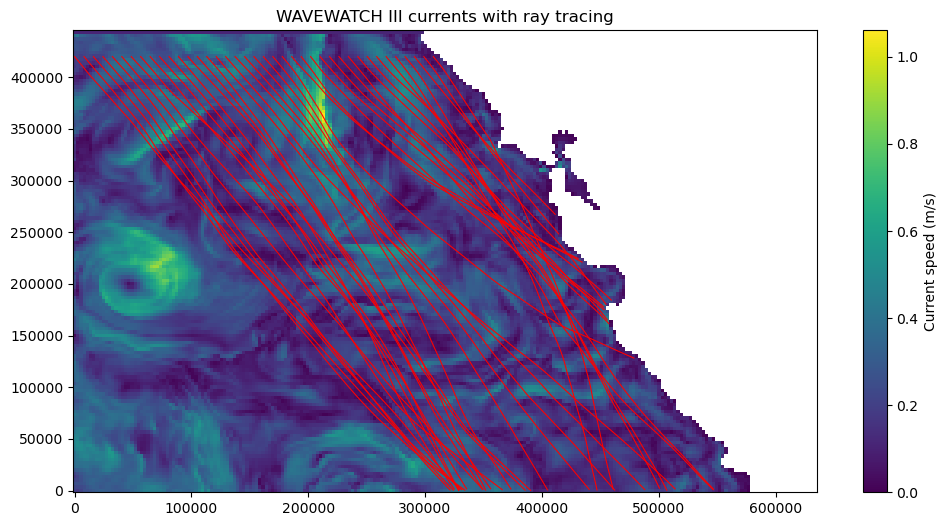

In [9]:
X = ds.x
Y = ds.y
U = (ds.u**2 + ds.v**2)**.5
plt.figure(figsize=(12, 6))
cs = plt.pcolormesh(X, Y, U)
for i in range(bundle.ray.size)[::2]:
    ray = bundle.isel(ray=i)
    plt.plot(ray.x, ray.y, 'red', lw=.78)
plt.colorbar(cs, label='Current speed (m/s)')
plt.title('WAVEWATCH III currents with ray tracing')

### Plot wave height

Text(0.5, 1.0, 'WAVEWATCH III H_s with ray tracing')

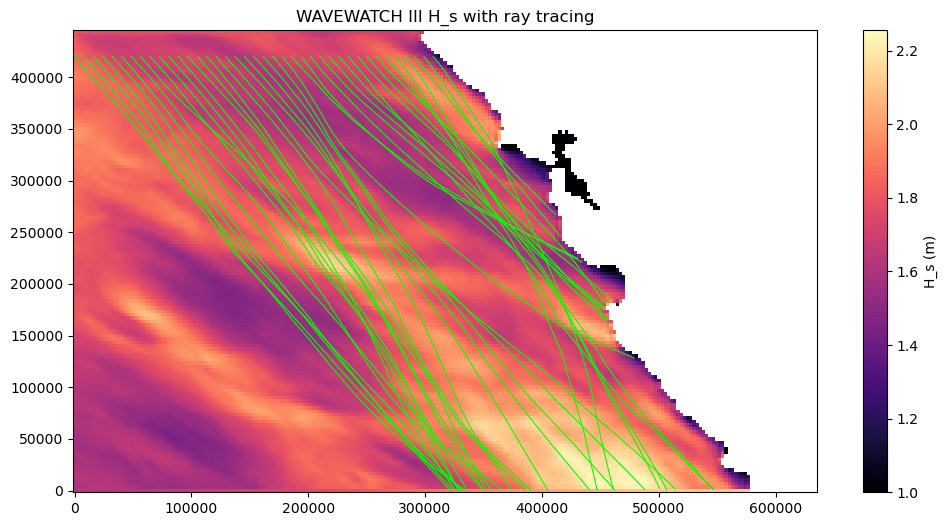

In [58]:
X = ds.x
Y = ds.y
hs = ds.hs
plt.figure(figsize=(12, 6))
cs = plt.pcolormesh(X, Y, hs, cmap='magma', vmin=1.0, vmax=np.max(hs))
for i in range(bundle.ray.size)[::2]:
    ray = bundle.isel(ray=i)
    plt.plot(ray.x, ray.y, 'lime', lw=.78)
plt.colorbar(cs, label='H_s (m)')
plt.title('WAVEWATCH III H_s with ray tracing')